In [25]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

import tensorflow as tf
import glob

import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.model_selection import train_test_split #helps to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder 


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2

from sklearn import preprocessing
import keras 

In [26]:
size = (121 , 121)

In [36]:
def display(path):
    
    im = cv2.imread(path)
    im_resized = cv2.resize(im, size, interpolation=cv2.INTER_LINEAR)
    #print(im_resized)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

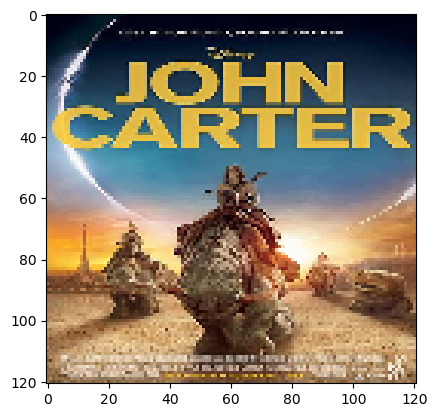

In [37]:
path = "./data/p2/John Carter_imdb,6.6_genre,Adventure.jpg"
display(path)

In [38]:
images = []
genres = []
def readImage():
    for path in glob.glob('./data/p2/*'):
        
        im = cv2.imread(path)
        im_resized = cv2.resize(im, size, interpolation=cv2.INTER_LINEAR)
        #print("appending:--",path)
        images.append(im_resized)
        
        item  = path.split("/")
        movie = item[3].split("_")
        genre = movie[2].split(".")[0].split(",")
        genres.append(genre[1])

In [39]:
readImage()

In [40]:
images = images[0:2000]
genres = genres[0:2000]

In [41]:
X = np.array(images).reshape(-1, 121, 121, 3)
X.shape

(2000, 121, 121, 3)

In [42]:
y = np.array(genres)
cat = np.unique(y)
pre = preprocessing.LabelEncoder()
pre.fit(cat)
y = pre.transform(y)
Y = np_utils.to_categorical(y, 20)
#Y = keras.utils.to_categorical(y, 20)
print(Y[100])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
batch_size = 1024
epochs = 400

In [44]:
def createModel_lenet():

              # LeNet-5 structure for model training
              model = keras.Sequential()
              model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(121, 121, 3)))
              # The first convolutional layer. Input shape is 28x28x1 and activation function is Rectified Linear Unit (ReLU).\
                                                                        # Kernel size and stride are set as (5,5) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (28/1) x (28/1) x 6 = 28x28x6, which is the same as the input shape.
              model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The first maxpooling layer. The pool size and stride are both (2,2), thus the output shape is 14x14x6, where 14 = (28-2)/2 + 1.
              model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu')) # The second convolutional layer. The output shape is 10x10x16, where 10 = (14-5+1)/1.
              model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))  # The second maxpooling layer. The pool size and stride are both (2,2). The output shape is 5x5x16, where 5 = (10-2)/2+1.
              model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector with a size of 1x400.
              model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
              model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
              model.add(keras.layers.Dense(20, activation='softmax'))    # The ouput layer. Softmax is used for probability estimation, which is suitable for classification tasks.
              model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-3), 'categorical_crossentropy', metrics='acc') # Model construction with a SGD optimizer, a categorical crossentropy loss function, and an accuracy metric.
              model.summary() # Summary the constructed model.
              model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size  , verbose = 2)
              return model

In [45]:
model = createModel_lenet()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 121, 121, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

Epoch 93/400
2/2 - 4s - loss: 2.8722 - acc: 0.2175 - 4s/epoch - 2s/step
Epoch 94/400
2/2 - 4s - loss: 2.8701 - acc: 0.2175 - 4s/epoch - 2s/step
Epoch 95/400
2/2 - 4s - loss: 2.8679 - acc: 0.2163 - 4s/epoch - 2s/step
Epoch 96/400
2/2 - 4s - loss: 2.8657 - acc: 0.2163 - 4s/epoch - 2s/step
Epoch 97/400
2/2 - 4s - loss: 2.8636 - acc: 0.2181 - 4s/epoch - 2s/step
Epoch 98/400
2/2 - 4s - loss: 2.8615 - acc: 0.2181 - 4s/epoch - 2s/step
Epoch 99/400
2/2 - 4s - loss: 2.8594 - acc: 0.2169 - 4s/epoch - 2s/step
Epoch 100/400
2/2 - 4s - loss: 2.8573 - acc: 0.2206 - 4s/epoch - 2s/step
Epoch 101/400
2/2 - 4s - loss: 2.8553 - acc: 0.2194 - 4s/epoch - 2s/step
Epoch 102/400
2/2 - 4s - loss: 2.8530 - acc: 0.2200 - 4s/epoch - 2s/step
Epoch 103/400
2/2 - 4s - loss: 2.8509 - acc: 0.2181 - 4s/epoch - 2s/step
Epoch 104/400
2/2 - 4s - loss: 2.8488 - acc: 0.2188 - 4s/epoch - 2s/step
Epoch 105/400
2/2 - 4s - loss: 2.8466 - acc: 0.2212 - 4s/epoch - 2s/step
Epoch 106/400
2/2 - 4s - loss: 2.8445 - acc: 0.2212 - 4s/e

Epoch 206/400
2/2 - 4s - loss: 2.6129 - acc: 0.2350 - 4s/epoch - 2s/step
Epoch 207/400
2/2 - 3s - loss: 2.6102 - acc: 0.2362 - 3s/epoch - 2s/step
Epoch 208/400
2/2 - 4s - loss: 2.6075 - acc: 0.2369 - 4s/epoch - 2s/step
Epoch 209/400
2/2 - 4s - loss: 2.6050 - acc: 0.2362 - 4s/epoch - 2s/step
Epoch 210/400
2/2 - 4s - loss: 2.6025 - acc: 0.2394 - 4s/epoch - 2s/step
Epoch 211/400
2/2 - 4s - loss: 2.5998 - acc: 0.2381 - 4s/epoch - 2s/step
Epoch 212/400
2/2 - 3s - loss: 2.5969 - acc: 0.2381 - 3s/epoch - 2s/step
Epoch 213/400
2/2 - 4s - loss: 2.5942 - acc: 0.2381 - 4s/epoch - 2s/step
Epoch 214/400
2/2 - 4s - loss: 2.5916 - acc: 0.2387 - 4s/epoch - 2s/step
Epoch 215/400
2/2 - 4s - loss: 2.5889 - acc: 0.2400 - 4s/epoch - 2s/step
Epoch 216/400
2/2 - 3s - loss: 2.5862 - acc: 0.2425 - 3s/epoch - 2s/step
Epoch 217/400
2/2 - 4s - loss: 2.5835 - acc: 0.2425 - 4s/epoch - 2s/step
Epoch 218/400
2/2 - 3s - loss: 2.5809 - acc: 0.2438 - 3s/epoch - 2s/step
Epoch 219/400
2/2 - 3s - loss: 2.5782 - acc: 0.2444

Epoch 319/400
2/2 - 4s - loss: 2.2237 - acc: 0.3425 - 4s/epoch - 2s/step
Epoch 320/400
2/2 - 4s - loss: 2.2193 - acc: 0.3456 - 4s/epoch - 2s/step
Epoch 321/400
2/2 - 4s - loss: 2.2148 - acc: 0.3462 - 4s/epoch - 2s/step
Epoch 322/400
2/2 - 4s - loss: 2.2102 - acc: 0.3456 - 4s/epoch - 2s/step
Epoch 323/400
2/2 - 4s - loss: 2.2058 - acc: 0.3494 - 4s/epoch - 2s/step
Epoch 324/400
2/2 - 4s - loss: 2.2011 - acc: 0.3494 - 4s/epoch - 2s/step
Epoch 325/400
2/2 - 4s - loss: 2.1966 - acc: 0.3525 - 4s/epoch - 2s/step
Epoch 326/400
2/2 - 4s - loss: 2.1920 - acc: 0.3569 - 4s/epoch - 2s/step
Epoch 327/400
2/2 - 4s - loss: 2.1877 - acc: 0.3562 - 4s/epoch - 2s/step
Epoch 328/400
2/2 - 4s - loss: 2.1829 - acc: 0.3550 - 4s/epoch - 2s/step
Epoch 329/400
2/2 - 4s - loss: 2.1784 - acc: 0.3600 - 4s/epoch - 2s/step
Epoch 330/400
2/2 - 4s - loss: 2.1738 - acc: 0.3575 - 4s/epoch - 2s/step
Epoch 331/400
2/2 - 3s - loss: 2.1690 - acc: 0.3625 - 3s/epoch - 2s/step
Epoch 332/400
2/2 - 4s - loss: 2.1645 - acc: 0.3619

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7/7 - 0s - loss: 3.2381 - acc: 0.1200 - 356ms/epoch - 51ms/step
Restored model, accuracy: 12.00%


In [46]:
prediction = model.predict(X_test)            # Prediction of the testing set
print (model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 19ms/step - loss: 3.0408 - acc: 0.1275
[3.0407514572143555, 0.1274999976158142]
